In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [47]:
df = pd.read_csv("sim_anneal.dat", sep=" ")
df = df[df.TIME < 15]
df.head()

,GRAPH_SIZE,GLOBAL_ITERATIONS,REAL_ITERATIONS,TIME,ERROR,RELATED_ERROR
0,100,10000,5305,0.637013,170,0.033663
1,100,10000,5055,0.579036,183,0.036238
2,100,10000,4096,0.469433,231,0.045743
3,100,10000,5880,0.649155,170,0.033663
4,100,10000,3868,0.449062,197,0.039010


In [48]:
variance = df.groupby('GRAPH_SIZE').var()
variance

,GLOBAL_ITERATIONS,REAL_ITERATIONS,TIME,ERROR,RELATED_ERROR
GRAPH_SIZE,,,,,
100,0.0,1.205356e+06,0.012628,6.634246e+02,0.000026
200,0.0,8.002282e+05,0.032924,4.186737e+03,0.000010
300,0.0,1.033960e+05,0.010544,1.107768e+04,0.000005
400,0.0,0.000000e+00,0.004239,3.126690e+04,0.000005
500,0.0,0.000000e+00,0.336920,9.051496e+04,0.000006
600,0.0,0.000000e+00,0.546972,1.921053e+05,0.000006
700,0.0,0.000000e+00,0.934994,4.333503e+05,0.000007
800,0.0,0.000000e+00,0.383393,8.841205e+05,0.000009
900,0.0,0.000000e+00,0.378131,1.297273e+06,0.000008


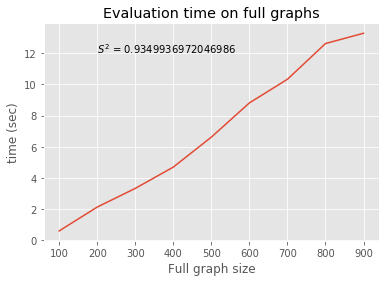

In [52]:
plt.title('Evaluation time on full graphs')
median = df.groupby('GRAPH_SIZE').median()
plt.plot(median.index.values, median['TIME'])
max_var = variance['TIME'].max()
plt.text(200, 12, r'$S^2$ = ' + str(max_var))
plt.ylabel('time (sec)')
plt.xlabel('Full graph size')
plt.show()

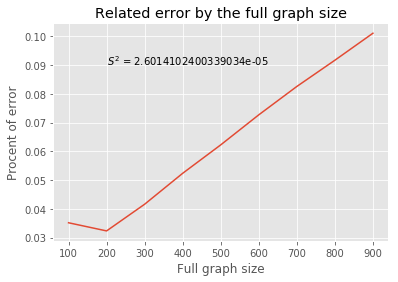

In [50]:
plt.title('Related error by the full graph size')
plt.plot(median.index.values, median['RELATED_ERROR'])
plt.ylabel('Procent of error')
plt.xlabel('Full graph size')
max_var = variance['RELATED_ERROR'].max()
plt.text(200, 0.09, r'$S^2$ = ' + str(max_var))
plt.show()